In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mounaharini","key":"1170755da182f5264dc2118254429436"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Mar  9 20:22 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!pwd

/content


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d yasserhessein/the-kvasir-dataset

100% 2.32G/2.32G [00:26<00:00, 68.8MB/s]
100% 2.32G/2.32G [00:26<00:00, 93.1MB/s]


In [ ]:
!unzip /content/the-kvasir-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: kvasir-dataset-v2/normal-cecum/00b1b20b-ce2b-449c-93fc-6df854e3ab33.jpg  
  inflating: kvasir-dataset-v2/normal-cecum/00b99f19-2c31-4c7c-931a-4c3b38d70d1a.jpg  
  inflating: kvasir-dataset-v2/normal-cecum/00f3d2cc-93ea-40f0-9b88-b159b07a49cb.jpg  
  inflating: kvasir-dataset-v2/normal-cecum/0111fb06-3113-4abf-9050-7bfb8d4688f5.jpg  
  inflating: kvasir-dataset-v2/normal-cecum/0163b3a2-9aa1-4b23-a9a8-aff07a738f16.jpg  
  inflating: kvasir-dataset-v2/normal-cecum/0191eafd-0367-4772-9181-296b80dbf917.jpg  
  inflating: kvasir-dataset-v2/normal-cecum/01af3454-037f-4708-b73c-6ec4423b6a61.jpg  
  inflating: kvasir-dataset-v2/normal-cecum/01b9de1c-1481-4056-b27a-4d8fa09da06f.jpg  
  inflating: kvasir-dataset-v2/normal-cecum/01bddb73-9c5d-4ac0-8b25-cc7524b7d191.jpg  
  inflating: kvasir-dataset-v2/normal-cecum/01c48bf5-3f79-45dd-9390-add72a6da946.jpg  
  inflating: kvasir-dataset-v2/normal-cecum/01c49663-9674-44ae-b61e-05243a30e4a

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential,load_model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Input
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.applications import DenseNet121,DenseNet201
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization

In [ ]:
#Dataset:
import os
# dataset_path = os.listdir("/content/kvasir-dataset-v2")
gs_types = os.listdir("/content/kvasir-dataset-v2")
print (gs_types)

['esophagitis', 'ulcerative-colitis', 'normal-pylorus', 'dyed-resection-margins', 'dyed-lifted-polyps', 'polyps', 'normal-z-line', 'normal-cecum']


In [ ]:
gs_data = []

for item in gs_types:
 # Get all the file names
#  all_gs_data = all_gss_test = [i for i in os.listdir('/content/DATASET/TEST' + '/' +item) if i.endswith('.JPG' or '.jpg' or '.png' or '.PNG')]
 all_gs_data = all_gss_test = [i for i in os.listdir('/content/kvasir-dataset-v2' + '/' +item)]
 #print(all_shoes)

 # Add them to the list
 for gs in all_gs_data:
    gs_data.append((item, str('/content/kvasir-dataset-v2' + '/' +item) + '/' + gs))
    print(gs_data[:1])

Streaming output truncated to the last 5000 lines.
[('esophagitis', '/content/kvasir-dataset-v2/esophagitis/3727a07b-569a-4c57-b613-5a55d568e6f3.jpg')]
[('esophagitis', '/content/kvasir-dataset-v2/esophagitis/3727a07b-569a-4c57-b613-5a55d568e6f3.jpg')]
[('esophagitis', '/content/kvasir-dataset-v2/esophagitis/3727a07b-569a-4c57-b613-5a55d568e6f3.jpg')]
[('esophagitis', '/content/kvasir-dataset-v2/esophagitis/3727a07b-569a-4c57-b613-5a55d568e6f3.jpg')]
[('esophagitis', '/content/kvasir-dataset-v2/esophagitis/3727a07b-569a-4c57-b613-5a55d568e6f3.jpg')]
[('esophagitis', '/content/kvasir-dataset-v2/esophagitis/3727a07b-569a-4c57-b613-5a55d568e6f3.jpg')]
[('esophagitis', '/content/kvasir-dataset-v2/esophagitis/3727a07b-569a-4c57-b613-5a55d568e6f3.jpg')]
[('esophagitis', '/content/kvasir-dataset-v2/esophagitis/3727a07b-569a-4c57-b613-5a55d568e6f3.jpg')]
[('esophagitis', '/content/kvasir-dataset-v2/esophagitis/3727a07b-569a-4c57-b613-5a55d568e6f3.jpg')]
[('esophagitis', '/content/kvasir-datase

In [ ]:
# Build a dataframe        
gs_data_df = pd.DataFrame(data=gs_data, columns=['gs type', 'image'])
print(len(gs_data_df))
print(gs_data_df.head())
print(gs_data_df.tail())

8000
       gs type                                              image
0  esophagitis  /content/kvasir-dataset-v2/esophagitis/3727a07...
1  esophagitis  /content/kvasir-dataset-v2/esophagitis/56990aa...
2  esophagitis  /content/kvasir-dataset-v2/esophagitis/23640c4...
3  esophagitis  /content/kvasir-dataset-v2/esophagitis/fdc184a...
4  esophagitis  /content/kvasir-dataset-v2/esophagitis/0db6478...
           gs type                                              image
7995  normal-cecum  /content/kvasir-dataset-v2/normal-cecum/b90dc7...
7996  normal-cecum  /content/kvasir-dataset-v2/normal-cecum/76142b...
7997  normal-cecum  /content/kvasir-dataset-v2/normal-cecum/3b3d6a...
7998  normal-cecum  /content/kvasir-dataset-v2/normal-cecum/4e5f0e...
7999  normal-cecum  /content/kvasir-dataset-v2/normal-cecum/aca346...


In [ ]:
# Image Exploratory Analysis
import numpy as np
# print("Total number of gss in the Train dataset before: ", len(gs_data_df))

# gs_train_count_before = gs_data_df['gs type'].value_counts()

# gs_data_df = gs_data_df[gs_data_df['gs type'].map(gs_data_df['gs type'].value_counts()) > 1]
# col_list =  list(gs_data_df['gs type'])
# print(col_list)
# gs_train_type, counts = np.unique(col_list, return_counts=True)
gs_count = gs_data_df['gs type'].value_counts()
print("Total number of gss in the dataset: ", len(gs_data_df))
# print(gs_data_df)
print("gss in each category: ")
print(gs_count)

Total number of gss in the dataset:  8000
gss in each category: 
esophagitis               1000
ulcerative-colitis        1000
normal-pylorus            1000
dyed-resection-margins    1000
dyed-lifted-polyps        1000
polyps                    1000
normal-z-line             1000
normal-cecum              1000
Name: gs type, dtype: int64


## Image Preprocessing

In [ ]:
import cv2
path_train = '/content/kvasir-dataset-v2'


im_size = 64

images = []
labels = []

for i in gs_types:
    data_path_train = path_train + '/'+ str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    print(data_path_train)
    # filenames = [i for i in os.listdir(data_path_train) if i.endswith('.JPG' or '.jpg' or '.png' or '.PNG')]
    filenames = [i for i in os.listdir(data_path_train)]
    print(filenames)  # will get the names of all images which ends with .jpg extension
    for f in filenames:
        img = cv2.imread(data_path_train + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

/content/kvasir-dataset-v2/esophagitis
['3727a07b-569a-4c57-b613-5a55d568e6f3.jpg', '56990aa3-2a8d-4493-ba6e-b73cb17d24d2.jpg', '23640c48-6dd2-4f6c-9c1c-466df61484af.jpg', 'fdc184a4-f124-4a38-9602-1b8e1c7227a1.jpg', '0db64783-db8d-4663-b448-04036c482069.jpg', 'dc4c18e2-3dd4-462b-9974-07318d2a8516.jpg', 'ff0b2f1d-9d25-48a4-8c7f-5caac483c96d.jpg', 'ed564760-9019-43b6-901e-4ec6bf68af18.jpg', '42d23093-b083-4d5a-b7a5-f39348e07bb2.jpg', 'a421ef5a-e130-4abc-9218-8ba5397d0b2c.jpg', 'f0269d34-85b7-4ace-8cea-f08d1d2ca0ac.jpg', 'ac3b1938-a8c7-4359-9366-bd4502da1965.jpg', 'e648c132-fa9c-4273-b4ce-6ff8c0b28710.jpg', 'fcf285b0-87ed-4480-9098-9dc587e1e149.jpg', '3a677aa1-89c3-4e2d-8dac-15562959f065.jpg', 'dbf45d72-58cb-4743-a02d-61bc601c7f1e.jpg', '9d473636-5b23-4c70-9bce-1e436d93dc01.jpg', 'e6095686-70ae-4b1b-a72e-a047e4c319f2.jpg', 'b71d9a49-1135-49ce-93f3-fee8e1725e17.jpg', 'b5ae3dbf-6ba3-4430-bfc3-4ae9989af6f2.jpg', '08bc0a31-989f-4b8a-8f95-9477ace18a82.jpg', 'c923b3b4-391e-41b9-93b2-0cc11c2b751

In [ ]:
# Transform the image array to a numpy type

images = np.array(images) # Converting List into array - Since Deep Learning accepts only array as the input shape

images.shape

(8000, 64, 64, 3)

In [ ]:
images = images.astype('float32') / 255.0  

In [ ]:
images.shape

(8000, 64, 64, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=gs_data_df['gs type'].values
print(y[:5])

['esophagitis' 'esophagitis' 'esophagitis' 'esophagitis' 'esophagitis']


In [ ]:
# for y
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform (y)
print(len(y))
print (y)

8000
[2 2 2 ... 3 3 3]


In [ ]:
y=y.reshape(-1,1)
print(y)

[[2]
 [2]
 [2]
 ...
 [3]
 [3]
 [3]]


In [ ]:
onehotencoder = OneHotEncoder(sparse=False)  
Y= onehotencoder.fit_transform(y)
Y.shape 

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(8000, 8)

### **Train-Test Split**

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

X_train, X_val, Y_train, Y_val = train_test_split(images, Y, test_size=0.2, random_state=10,stratify = Y)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(6400, 64, 64, 3)
(1600, 64, 64, 3)
(6400, 8)
(1600, 8)


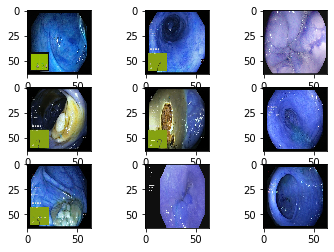

In [ ]:
#view few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [ ]:
print(Y_val)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


### **Model 1- Custom CNN**

In [ ]:
EPOCHS = 100 
BATCH_SIZE = 32
SIZE=64
N_ch=3

In [ ]:
def conv_layer (filterx) :
    
    model = Sequential()
    
    model.add(Conv2D(filterx, (3,3), padding = 'same', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2, 2)))
    
    return model

def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(LeakyReLU())
    
    return model

In [ ]:
def cnn (filter1, filter2, hidden1, hidden2,hidden3,hidden4,hidden5) :
    
    model = Sequential([
        
        Input((64, 64, 3,)),
        conv_layer(filter1),
        conv_layer(filter2),
        Flatten(),
        dens_layer(hidden1),
        dens_layer(hidden2),
        dens_layer(hidden3),
        dens_layer(hidden4),
        dens_layer(hidden5),
        
        Dense(8, activation = 'softmax')
    ])
    
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
    return model

In [ ]:
model = cnn(2**3,
            2**3,
            2**9,
            2**8,
            2**7,
            2**6,
            2**5)

In [ ]:
print(model.summary())

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_65 (Sequential)  (None, 32, 32, 8)         256       
                                                                 
 sequential_66 (Sequential)  (None, 16, 16, 8)         616       
                                                                 
 flatten_17 (Flatten)        (None, 2048)              0         
                                                                 
 sequential_67 (Sequential)  (None, 512)               1051136   
                                                                 
 sequential_68 (Sequential)  (None, 256)               132352    
                                                                 
 sequential_69 (Sequential)  (None, 128)               33408     
                                                                 
 sequential_70 (Sequential)  (None, 64)              

In [ ]:
# augumenting the data and then fitting the model- (2 hours training time)
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('cnn_model.h5', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=90, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

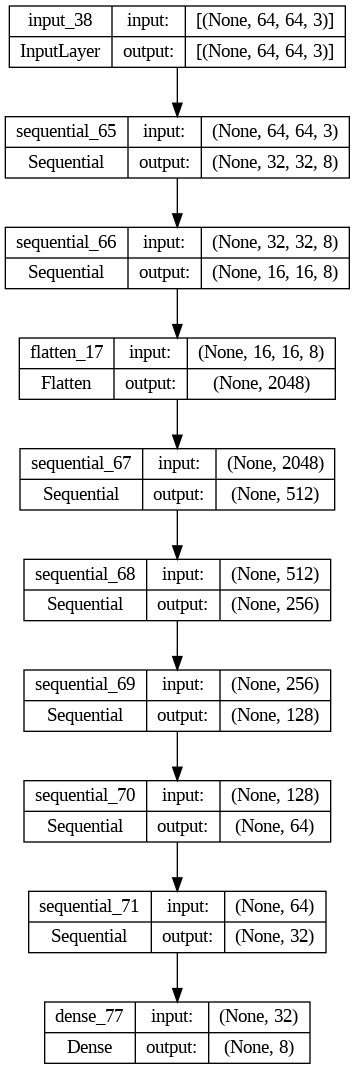

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='cnn.png', show_shapes=True,show_layer_names=True)
Image(filename='/content/cnn.png') 

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint,early_stop],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/50


<ipython-input-166-eee6be945f95>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 1.29128, saving model to cnn_model.h5
200/200 - 9s - loss: 1.2404 - accuracy: 0.5680 - val_loss: 1.2913 - val_accuracy: 0.5750 - lr: 0.0010 - 9s/epoch - 46ms/step
Epoch 2/50

Epoch 2: val_loss did not improve from 1.29128
200/200 - 8s - loss: 1.2536 - accuracy: 0.5661 - val_loss: 1.3549 - val_accuracy: 0.4988 - lr: 0.0010 - 8s/epoch - 40ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 1.29128
200/200 - 9s - loss: 1.2437 - accuracy: 0.5609 - val_loss: 1.5212 - val_accuracy: 0.4725 - lr: 0.0010 - 9s/epoch - 46ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 1.29128
200/200 - 9s - loss: 1.2478 - accuracy: 0.5714 - val_loss: 1.4564 - val_accuracy: 0.4394 - lr: 0.0010 - 9s/epoch - 45ms/step
Epoch 5/50

Epoch 5: val_loss improved from 1.29128 to 1.25745, saving model to cnn_model.h5
200/200 - 8s - loss: 1.2470 - accuracy: 0.5547 - val_loss: 1.2575 - val_accuracy: 0.5419 - lr: 0.0010 - 8s/epoch - 40ms/step
Epoch 6/50

Epoch 6: val_lo

In [ ]:
# computing the final loss and accuracy
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

50/50 [==============================] - 0s 4ms/step - loss: 1.3635 - accuracy: 0.5462
Final Loss: 1.363530158996582, Final Accuracy: 0.5462499856948853


50/50 [==============================] - 0s 3ms/step


Text(0.5, 145.31999999999996, 'Predicted')

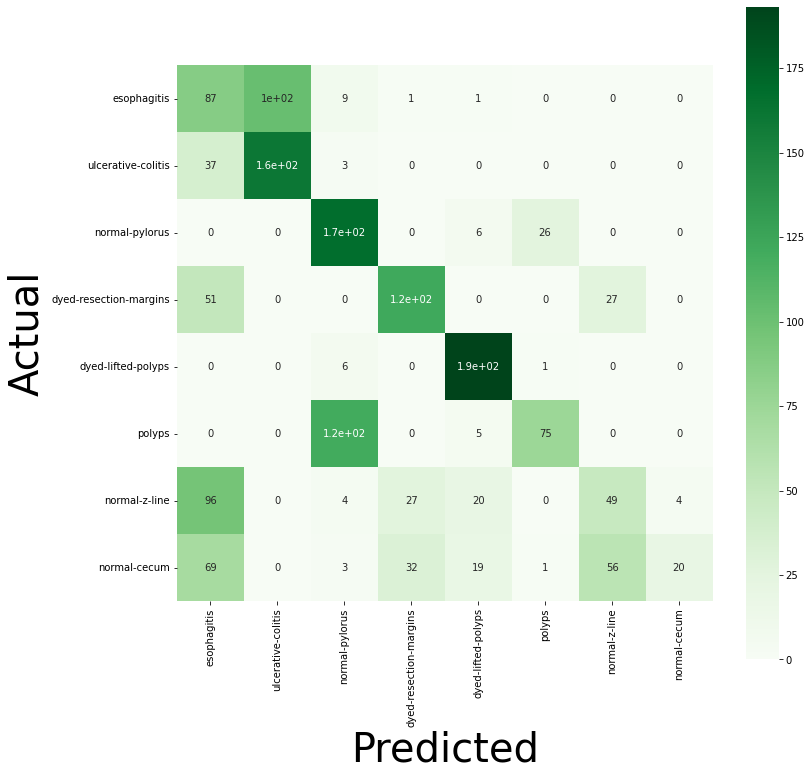

In [ ]:
#Finding and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=gs_types, yticklabels=gs_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=gs_types))

                        precision    recall  f1-score   support

           esophagitis       0.26      0.43      0.32       200
    ulcerative-colitis       0.61      0.80      0.69       200
        normal-pylorus       0.54      0.84      0.65       200
dyed-resection-margins       0.67      0.61      0.64       200
    dyed-lifted-polyps       0.79      0.96      0.87       200
                polyps       0.73      0.38      0.50       200
         normal-z-line       0.37      0.24      0.30       200
          normal-cecum       0.83      0.10      0.18       200

              accuracy                           0.55      1600
             macro avg       0.60      0.55      0.52      1600
          weighted avg       0.60      0.55      0.52      1600



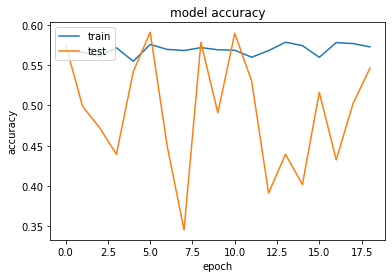

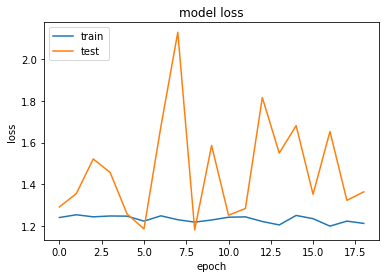

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Model 2 - DenseNet201**

In [ ]:
EPOCHS = 50 
BATCH_SIZE = 32
SIZE=64
N_ch=3

In [ ]:
#using DenseNet201 Model
def build_densenet201():
    densenet = DenseNet201(weights='imagenet', include_top=False)
    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), activation='relu',padding='same')(input)    
    x = densenet(x) 
    x = GlobalAveragePooling2D()(x)  #123rd layer
    # x = BatchNormalization()(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    x = Dropout(0.2)(x)

    # # x = Conv2D(32, (5, 5), activation='relu',padding='same')(x)
    # # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)  
    # x = BatchNormalization()(x) # Avoiding overfitting means penalising the models/neural network
    # x = Dropout(0.2)(x)  #OVERFITTING (MUGUP) 

    # # x = Conv2D(64, (5, 5), activation='relu',padding='same')(x)  
    # # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    # # x = BatchNormalization()(x)    
    # # x = Dropout(0.2)(x)

    # # x = Conv2D(64, (5, 5), activation='relu',padding='same')(x) 
    # # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x) 
    x = BatchNormalization()(x)    
    # # x = Dropout(0.2)(x)
    
    # x = Flatten()(x)
    # x = Dense(512, activation='relu')(x)
    # x = Dropout(0.25)(x)
    # x = Dense(256, activation='relu')(x)
    # # x = Dropout(0.2)(x)
    # x = Dense(128, activation='relu')(x)
    output = Dense(8, activation='softmax',name='densenet_201')(x)

    # multi output
    # output = Dense(10,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    # optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    optimizer = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
# augumenting the data and then fitting the model- (2 hours training time)
model = build_densenet201()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('densenet201_model.h5', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=90, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 densenet201 (Functional)    (None, None, None, 1920)  18321984  
                                                                 
 global_average_pooling2d_1   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1920)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1920)             7680      
 hNormalization)                                           

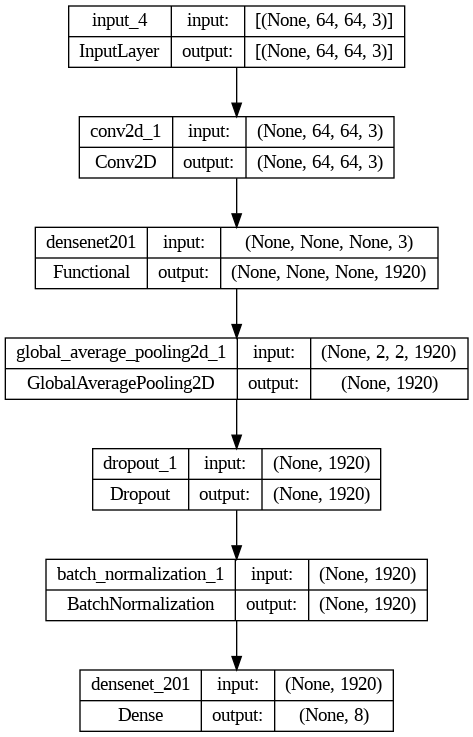

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='densnet201.png', show_shapes=True,show_layer_names=True)
Image(filename='/content/densnet201.png') 

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint,early_stop],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

<ipython-input-47-eee6be945f95>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


Epoch 1/50

Epoch 1: val_loss improved from inf to 2.18451, saving model to densenet201_model.h5
200/200 - 164s - loss: 1.0137 - accuracy: 0.6020 - val_loss: 2.1845 - val_accuracy: 0.3519 - lr: 0.0010 - 164s/epoch - 821ms/step
Epoch 2/50

Epoch 2: val_loss improved from 2.18451 to 0.96844, saving model to densenet201_model.h5
200/200 - 36s - loss: 0.7413 - accuracy: 0.7081 - val_loss: 0.9684 - val_accuracy: 0.6225 - lr: 0.0010 - 36s/epoch - 182ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.96844 to 0.76165, saving model to densenet201_model.h5
200/200 - 37s - loss: 0.6290 - accuracy: 0.7556 - val_loss: 0.7617 - val_accuracy: 0.7063 - lr: 0.0010 - 37s/epoch - 183ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.76165
200/200 - 34s - loss: 0.5765 - accuracy: 0.7736 - val_loss: 1.1062 - val_accuracy: 0.6331 - lr: 0.0010 - 34s/epoch - 170ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.76165
200/200 - 36s - loss: 0.6193 - accuracy: 0.7559 - val_loss: 2.3962 - 

In [ ]:
# computing the final loss and accuracy
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

50/50 [==============================] - 2s 34ms/step - loss: 0.6094 - accuracy: 0.8363
Final Loss: 0.6093957424163818, Final Accuracy: 0.8362500071525574


50/50 [==============================] - 5s 33ms/step


Text(0.5, 145.31999999999996, 'Predicted')

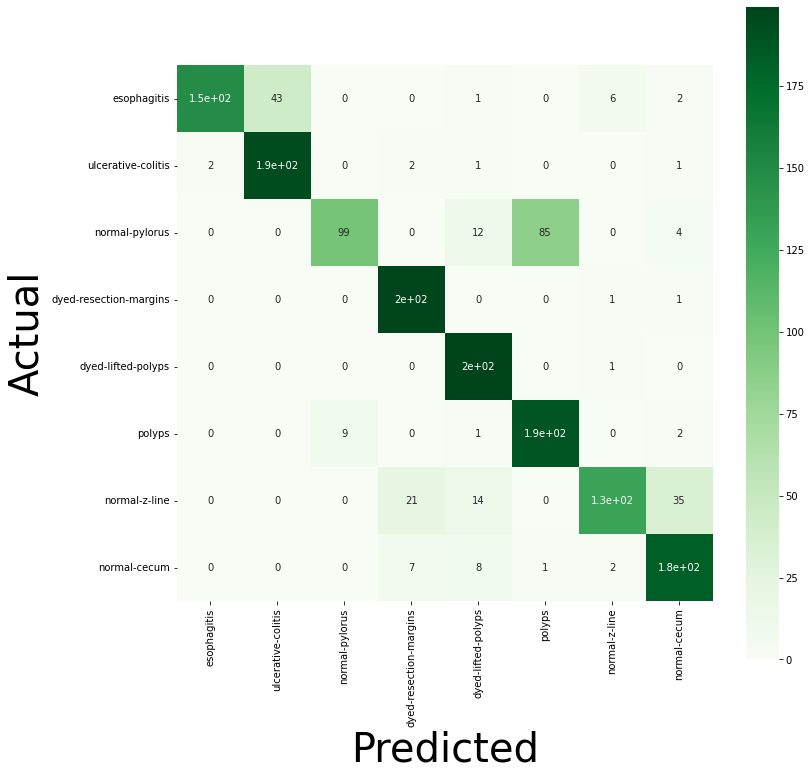

In [ ]:
#Findong and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=gs_types, yticklabels=gs_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=gs_types))

                        precision    recall  f1-score   support

           esophagitis       0.99      0.74      0.85       200
    ulcerative-colitis       0.82      0.97      0.89       200
        normal-pylorus       0.92      0.49      0.64       200
dyed-resection-margins       0.87      0.99      0.93       200
    dyed-lifted-polyps       0.84      0.99      0.91       200
                polyps       0.69      0.94      0.79       200
         normal-z-line       0.93      0.65      0.76       200
          normal-cecum       0.80      0.91      0.85       200

              accuracy                           0.84      1600
             macro avg       0.86      0.84      0.83      1600
          weighted avg       0.86      0.84      0.83      1600



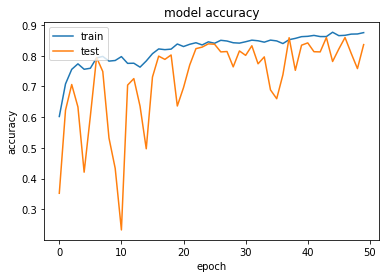

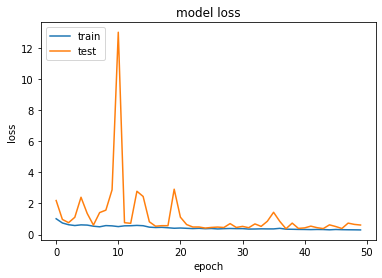

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Model 3 - ResNet50**

In [ ]:
EPOCHS = 100 
BATCH_SIZE = 32
SIZE=64
N_ch=3

In [ ]:
def build_resnet50():
    resnet50 = ResNet50(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = resnet50(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    # multi output
    output = Dense(8,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
# augumenting the data and then fitting the model- (2 hours training time)
model = build_resnet50()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('resnet50_model.h5', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=90, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 3)         84        
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_12  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_17 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 2048)              0  

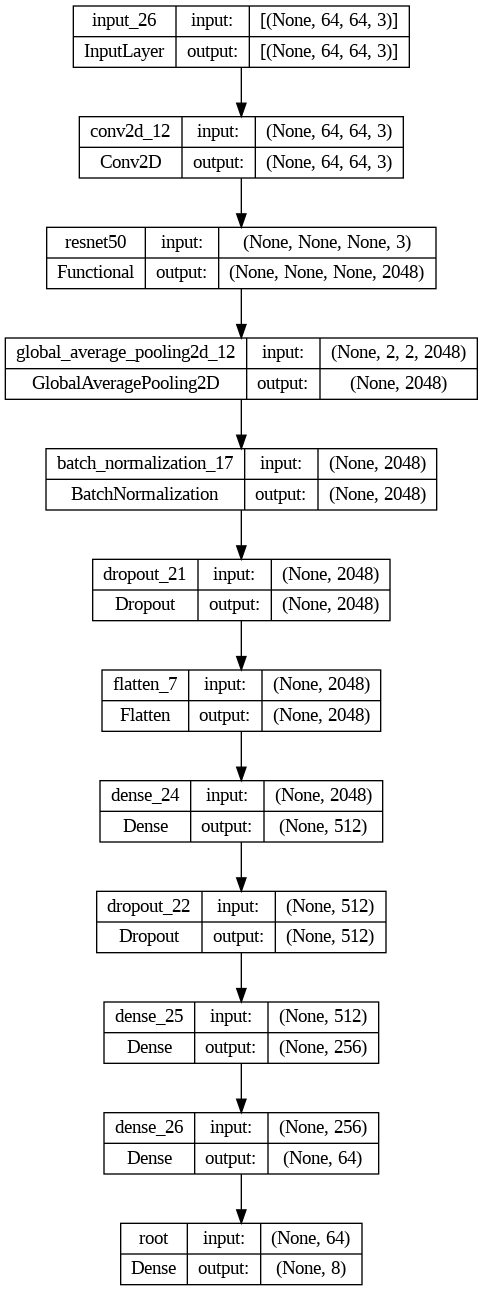

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='resnet50.png', show_shapes=True,show_layer_names=True)
Image(filename='/content/resnet50.png') 

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint,early_stop],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/100


<ipython-input-118-eee6be945f95>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 10.01534, saving model to resnet50_model.h5
200/200 - 55s - loss: 1.4988 - accuracy: 0.4280 - val_loss: 10.0153 - val_accuracy: 0.1250 - lr: 0.0010 - 55s/epoch - 273ms/step
Epoch 2/100

Epoch 2: val_loss improved from 10.01534 to 3.88706, saving model to resnet50_model.h5
200/200 - 17s - loss: 0.9116 - accuracy: 0.5986 - val_loss: 3.8871 - val_accuracy: 0.1250 - lr: 0.0010 - 17s/epoch - 87ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 3.88706
200/200 - 17s - loss: 0.7552 - accuracy: 0.6905 - val_loss: 7.4402 - val_accuracy: 0.1250 - lr: 0.0010 - 17s/epoch - 83ms/step
Epoch 4/100

Epoch 4: val_loss improved from 3.88706 to 3.24230, saving model to resnet50_model.h5
200/200 - 18s - loss: 0.7689 - accuracy: 0.6864 - val_loss: 3.2423 - val_accuracy: 0.1700 - lr: 0.0010 - 18s/epoch - 90ms/step
Epoch 5/100

Epoch 5: val_loss improved from 3.24230 to 1.11753, saving model to resnet50_model.h5
200/200 - 16s - loss: 0.6882 - accuracy: 0.7262 

In [ ]:
# computing the final loss and accuracy
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

50/50 [==============================] - 1s 26ms/step - loss: 0.5460 - accuracy: 0.8006
Final Loss: 0.5459602475166321, Final Accuracy: 0.8006250262260437


50/50 [==============================] - 5s 25ms/step


Text(0.5, 145.31999999999996, 'Predicted')

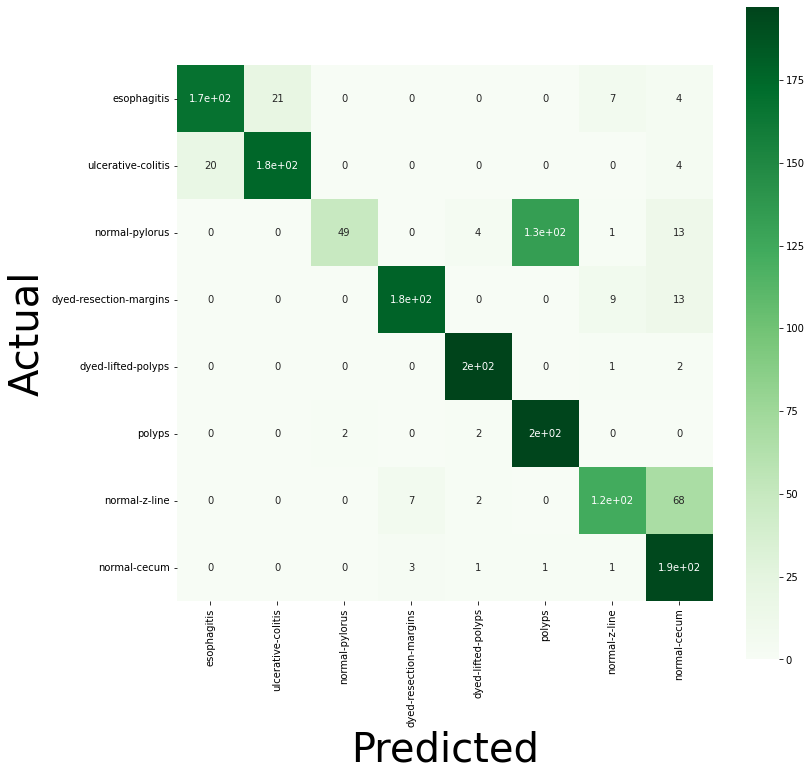

In [ ]:
#Findong and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=gs_types, yticklabels=gs_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=gs_types))

                        precision    recall  f1-score   support

           esophagitis       0.89      0.84      0.87       200
    ulcerative-colitis       0.89      0.88      0.89       200
        normal-pylorus       0.96      0.24      0.39       200
dyed-resection-margins       0.95      0.89      0.92       200
    dyed-lifted-polyps       0.96      0.98      0.97       200
                polyps       0.59      0.98      0.74       200
         normal-z-line       0.87      0.61      0.72       200
          normal-cecum       0.65      0.97      0.78       200

              accuracy                           0.80      1600
             macro avg       0.85      0.80      0.78      1600
          weighted avg       0.85      0.80      0.78      1600



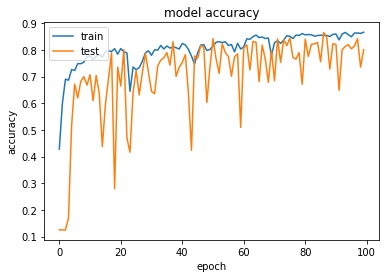

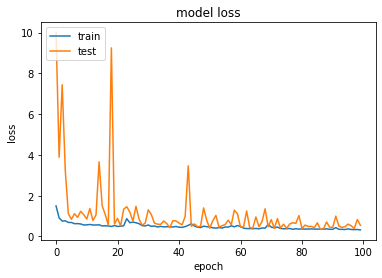

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()